#### Hồi quy tuyến tính:
Các bài toán học máy thì cần có dữ liệu, mô hình và sau đó là huấn luyện mô hình để tìm ra lời giải của bài toán (Cụ thể hơn là tìm được 1 hàm để từ Input ta tính được Output)

Một trong những mô hình đơn giản nhất là mô hình tuyến tính được thể hiện bởi một bộ các tham số $\theta_0, \theta_1, … \theta_n$ liên hệ với các đặc trưng của đối tượng dưới dạng 1 hàm số bậc nhất như sau:

$\hat{y}=\theta_{0}+x_{1}*\theta_{1}+x_{2}*\theta_{2}+...+x_{n}*\theta_{n}$

 Trong đó:
 - $x_1, x_2, … x_n$ là giá trị đặc trưng
 - $\theta_0, \theta_1, … \theta_n$ gọi là các tham số. 
 
Mục tiêu huấn luyện là tìm được bộ tham số có kết quả sai số nhỏ nhất

$MSE\left(\mathbf{X}, h_{\boldsymbol{\theta}}\right)=\frac{1}{m} \sum_{i=1}^m\left(\theta^T \mathbf{x}^{(i)}-y^{(i)}\right)^2$

Trong thống kê học, sai số toàn phương trung bình, viết tắt MSE của một phép ước lượng là trung bình của bình phương các sai số, tức là sự khác biệt giữa các ước lượng và những gì được đánh giá. MSE là một hàm rủi ro, tương ứng với giá trị kỳ vọng của sự mất mát sai số bình phương hoặc mất mát bậc hai

Công thức toán học để tính bộ tham số $\theta_0, \theta_1, … \theta_n$ là:

$\theta^{*}=\left(X^{T}X\right)^{-1}X^{T}y$

#### Tạo mẫu dữ liệu

In [19]:
import numpy as np

# Fix randomly generated values
np.random.seed(7)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

#### Mô hình hoá - vẽ đồ thị cho dữ liệu

Text(0.5, 1.0, 'Randomly Generated Linear dataset')

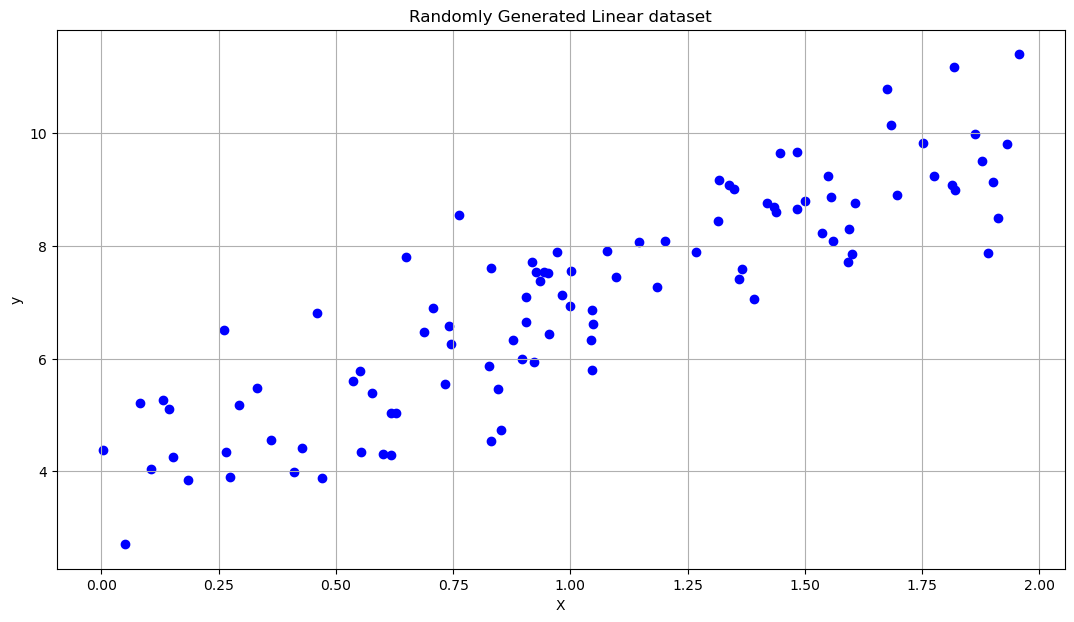

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(X, y, facecolor="blue")

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.grid()
ax.set_title("Randomly Generated Linear dataset")

# ax.legend()


#### Tính $θ^*$ - sử dụng công thức toán học
$\hat{y}=\theta_{0}+x_{1}*\theta_{1}+x_{2}*\theta_{2}+...+x_{n}*\theta_{n}$

$\theta^{*}=\left(X^{T}X\right)^{-1}X^{T}y$

In [21]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.84626494],
       [3.15105198]])

#### Đưa ra dự đoán với $\theta$ tính được 
$y=X*\theta^*$

In [22]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # thêm x0 = 1 cho dễ tính khi nhân
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84626494],
       [10.1483689 ]])

#### Tính LinearRegression bằng thư viện Scikit-Learn

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
# Make predictions 
y_pred = lin_reg.predict(X)
lin_reg.intercept_, lin_reg.coef_

#### Vẽ đồ thị hàm dự đoán
Ta có thể thấy là tính bằng công thức toán học và dùng thư viện thì đều cho kết quả tương tự

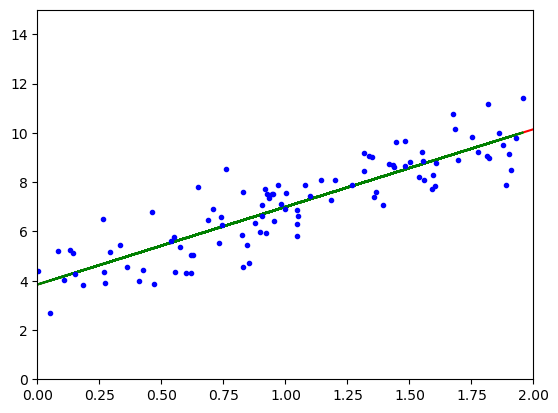

In [34]:
plt.plot(X_new, y_predict, "r-") # Đồ thị của kết quả tính bằng công thức toán
plt.plot(X, y_pred, "g-")        # Đồ thị của kết quả tính bằng thư viện
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()